<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-9/blob/main/Actividad_Semana4_Equipo_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Equipo 9:**

Luis Salvador Cruz Najera - A01002111

Laura Elena Hernández Mata - A01169213

Datos de la materia:
Ciencia y Analítica de datos

#**TC4029.10**

Profesor titular:
Jobish Vallikavungal Devassia

Fecha de entrega:
10 de octubre de 2022

## **Data Set Information:**

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.


Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; 

X7 = the repayment status in August, 2005; . . .;

X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 


Relevant Papers:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.



Citation Request:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [56]:
df = pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv")
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [57]:
df = df.rename(columns = {'X1':'monto_credito',
                          'X2':'genero',
                          'X3':'nivel_educativo',
                          'X4':'estado_civil',
                          'X5':'edad',
                          'X6':'pago_sept_2005',
                          'X7':'pago_agosto_2005',
                          'X8':'pago_julio_2005',
                          'X9':'pago_junio_2005',
                          'X10':'pago_mayo_2005',
                          'X11':'pago_abril_2005',
                          'X12':'amortizacion_sept_2005',
                          'X13':'amortizacion_agosto_2005',
                          'X14':'amortizacion_julio_2005',
                          'X15':'amortizacion_junio_2005',
                          'X16':'amortizacion_mayo_2005',
                          'X17':'amortizacion_abril_2005',
                          'X18':'pagoprev_sept_2005',
                          'X19':'pagoprev_agosto_2005',
                          'X20':'pagoprev_julio_2005',
                          'X21':'pagoprev_junio_2005',
                          'X22':'pagoprev_mayo_2005',
                          'X23':'pagoprev_abril_2005'}, inplace = False)

df.head()

,ID,monto_credito,genero,nivel_educativo,estado_civil,edad,pago_sept_2005,pago_agosto_2005,pago_julio_2005,pago_junio_2005,...,amortizacion_junio_2005,amortizacion_mayo_2005,amortizacion_abril_2005,pagoprev_sept_2005,pagoprev_agosto_2005,pagoprev_julio_2005,pagoprev_junio_2005,pagoprev_mayo_2005,pagoprev_abril_2005,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        30000 non-null  int64  
 1   monto_credito             30000 non-null  int64  
 2   genero                    29999 non-null  float64
 3   nivel_educativo           29998 non-null  float64
 4   estado_civil              29998 non-null  float64
 5   edad                      29995 non-null  float64
 6   pago_sept_2005            29997 non-null  float64
 7   pago_agosto_2005          29995 non-null  float64
 8   pago_julio_2005           29993 non-null  float64
 9   pago_junio_2005           29991 non-null  float64
 10  pago_mayo_2005            29984 non-null  float64
 11  pago_abril_2005           29986 non-null  float64
 12  amortizacion_sept_2005    29989 non-null  float64
 13  amortizacion_agosto_2005  29989 non-null  float64
 14  amorti

In [59]:
df.drop(columns={"ID", "genero", "nivel_educativo", "estado_civil", "pago_sept_2005",  "pago_agosto_2005", "pago_julio_2005", "pago_junio_2005", "pago_mayo_2005", "pago_abril_2005", "Y"}, inplace = True)

In [60]:
df.dropna(inplace = True)

[]

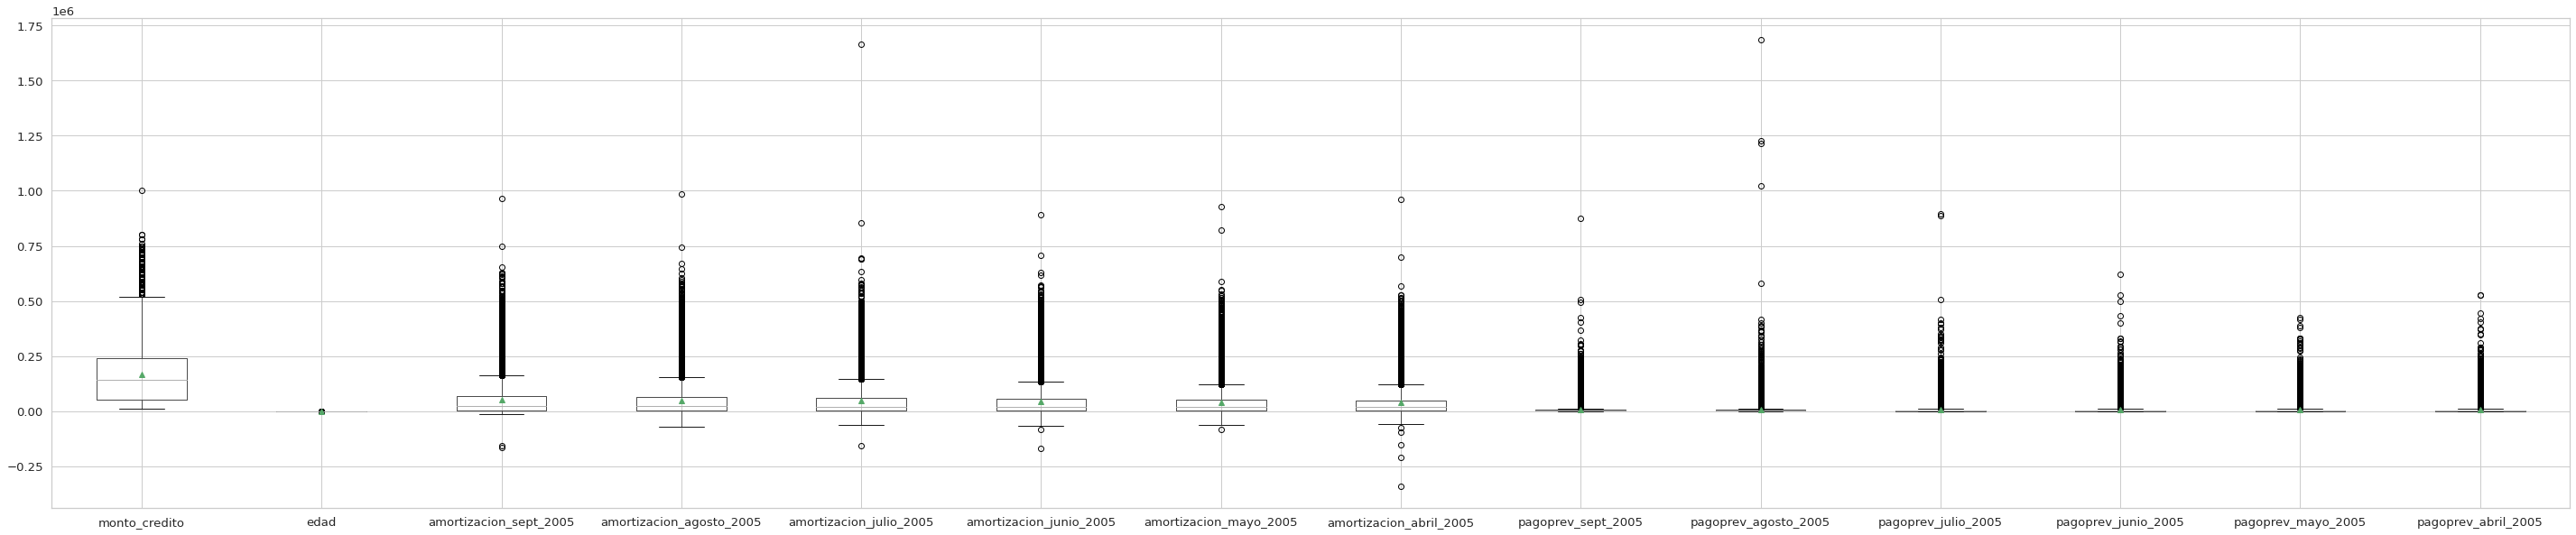

In [69]:
df_cols = df.columns.to_list()
boxplot = df.boxplot(figsize=(50,10), column=df_cols, labels=df_cols, showmeans = True)
boxplot.plot()

In [61]:
scaler = StandardScaler()
df_transformed = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_transformed.head()

,monto_credito,edad,amortizacion_sept_2005,amortizacion_agosto_2005,amortizacion_julio_2005,amortizacion_junio_2005,amortizacion_mayo_2005,amortizacion_abril_2005,pagoprev_sept_2005,pagoprev_agosto_2005,pagoprev_julio_2005,pagoprev_junio_2005,pagoprev_mayo_2005,pagoprev_abril_2005
0,-1.137171,-1.246018,-0.642621,-0.647502,-0.668106,-0.672592,-0.663184,-0.652856,-0.341883,-0.227134,-0.296787,-0.308091,-0.314115,-0.293458
1,-0.366343,-1.028971,-0.659333,-0.666842,-0.639377,-0.621748,-0.606374,-0.598118,-0.341883,-0.213642,-0.240012,-0.244285,-0.314115,-0.181003
2,-0.597591,-0.160781,-0.298805,-0.494058,-0.482587,-0.449902,-0.417397,-0.391856,-0.250245,-0.191951,-0.240012,-0.244285,-0.248680,-0.012322
3,-0.905922,0.164790,-0.057825,-0.013626,0.032485,-0.232620,-0.187017,-0.156891,-0.221148,-0.169435,-0.228657,-0.237905,-0.244165,-0.237230
4,-0.905922,2.335264,-0.578761,-0.611434,-0.161481,-0.347204,-0.348370,-0.331730,-0.221148,1.334291,0.270964,0.266157,-0.269030,-0.255279


[]

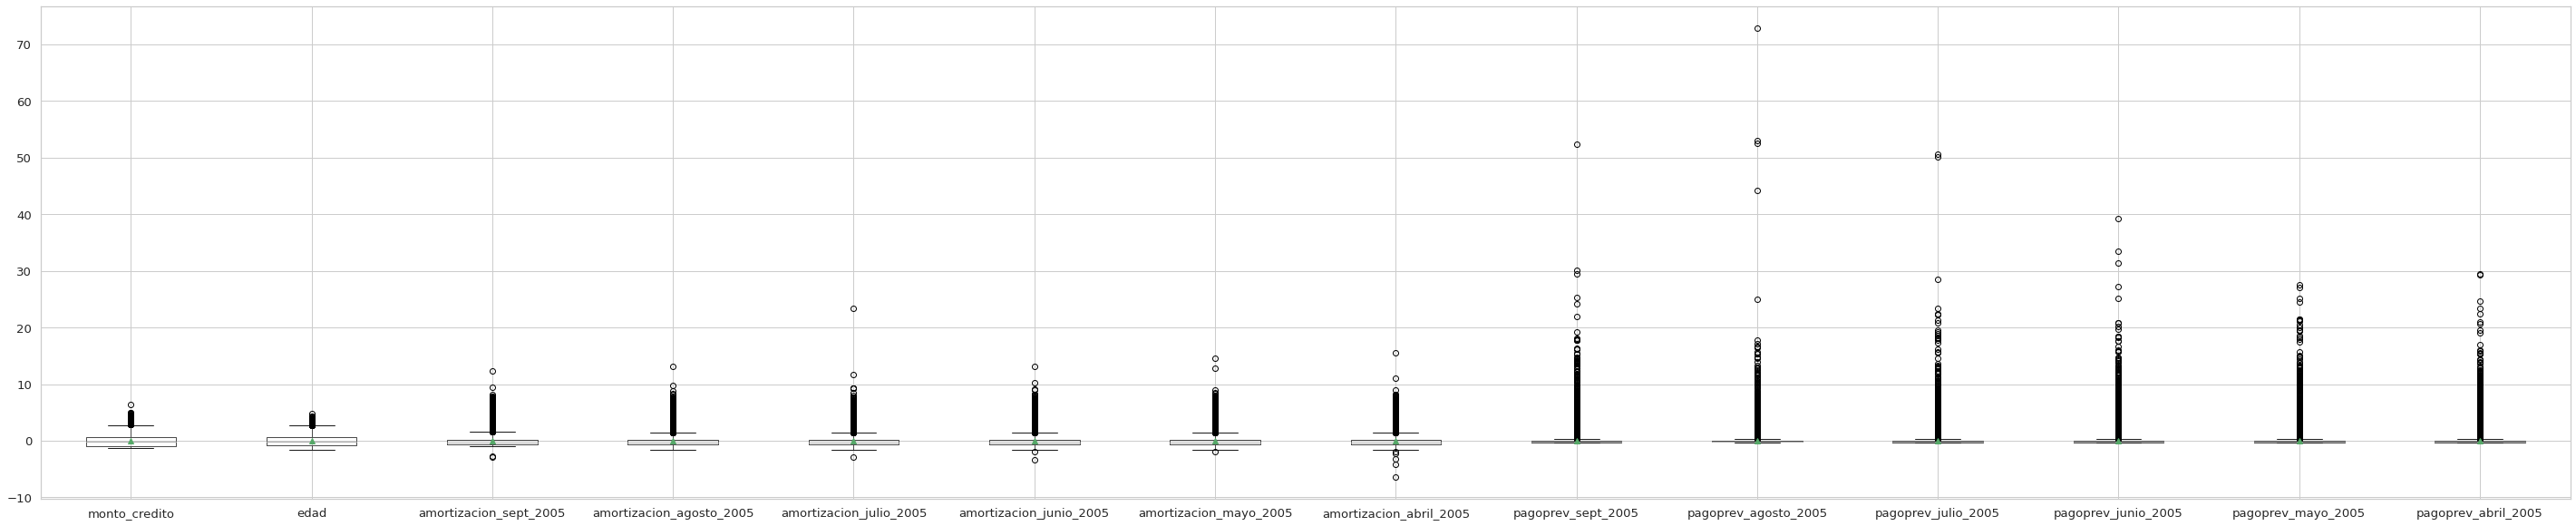

In [70]:
df_cols = df_transformed.columns.to_list()
boxplot = df_transformed.boxplot(figsize=(50,10), column=df_cols, labels=df_cols, showmeans = True)
boxplot.plot()

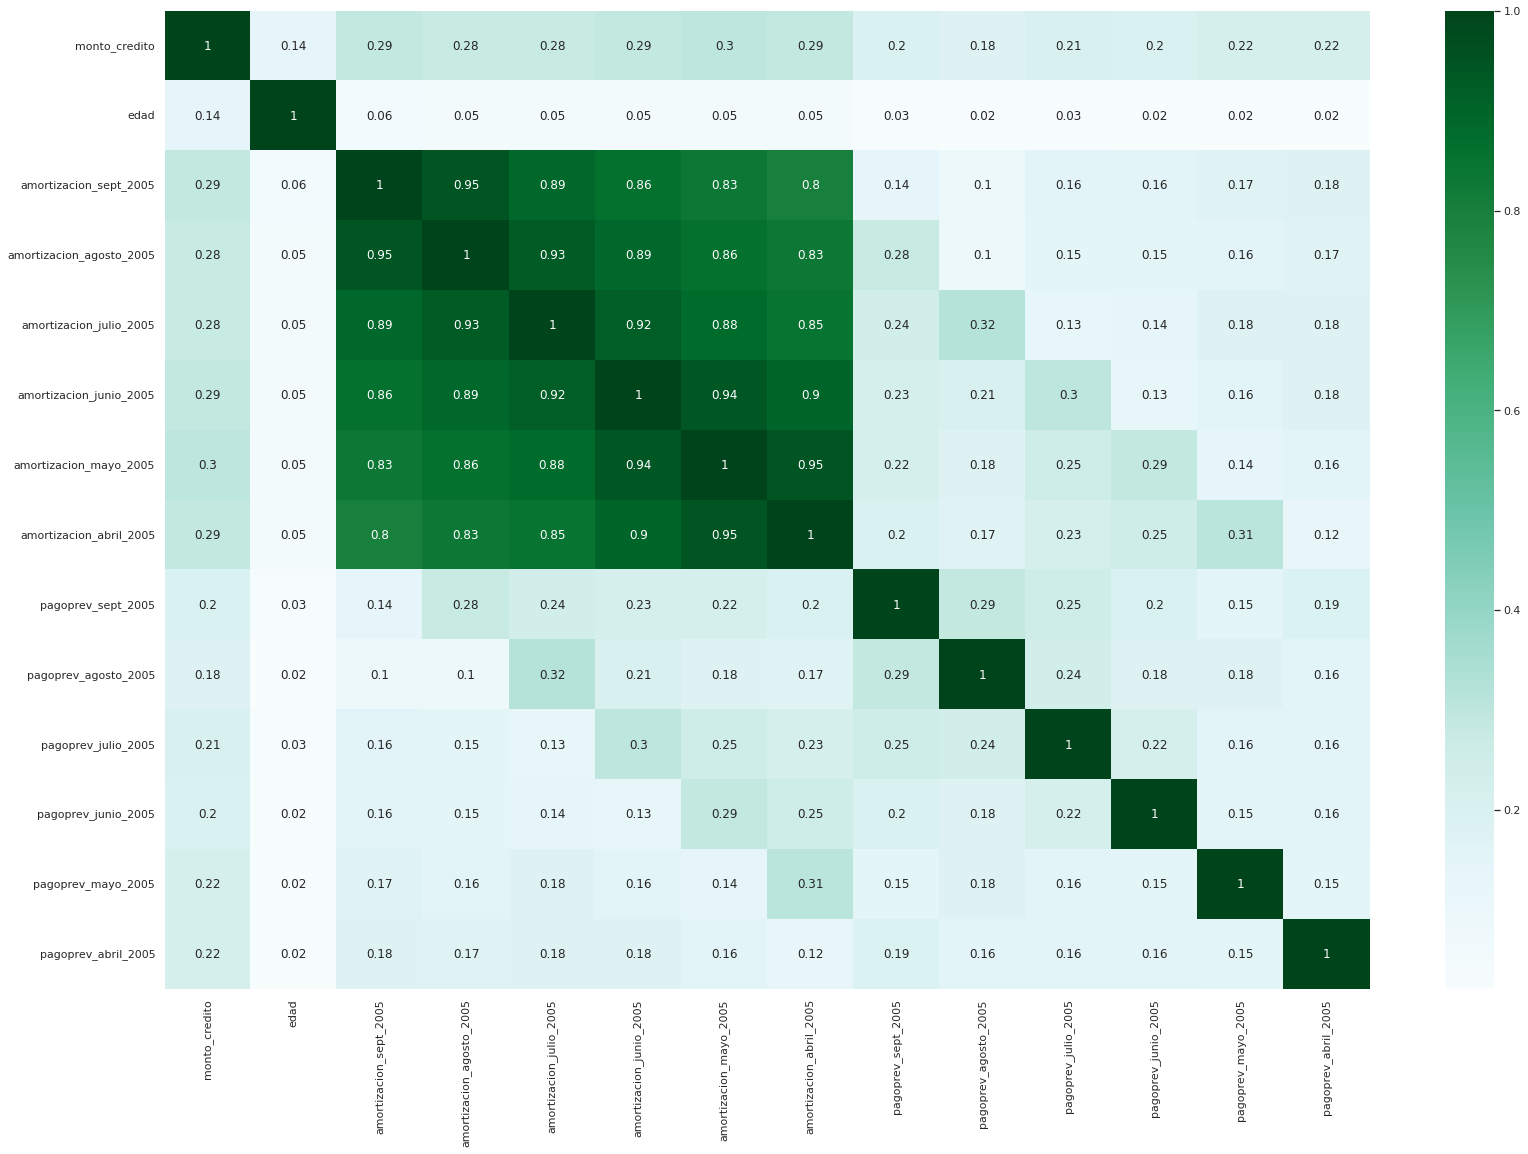

In [62]:
sns.set(rc={'figure.figsize':(27,18)}) 
#print(df.corr())
sns.heatmap(df_transformed.corr().round(2), annot=True, cmap="BuGn") 
plt.show()

In [63]:
pca = PCA()
pca.fit(df_transformed)
pcaSummary = pd.DataFrame({'Standard deviation': np.round(np.sqrt(pca.explained_variance_), 2),
                          'Proportion of variance': np.round(pca.explained_variance_ratio_ * 100, 2),
                          'Cumulative proportion': np.round(np.cumsum(pca.explained_variance_ratio_) * 100, 2) 
                          })

pcaSummary = pcaSummary.transpose()
pcaSummary.columns = ['PC{}'.format(i) for i in range(1, len(pcaSummary.columns) + 1)]
pcaSummary

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.43,1.31,1.02,0.96,0.94,0.93,0.88,0.85,0.84,0.51,0.27,0.20,0.16,0.15
Proportion of variance,42.28,12.26,7.46,6.61,6.31,6.23,5.57,5.19,5.05,1.89,0.51,0.29,0.18,0.17
Cumulative proportion,42.28,54.53,62.00,68.61,74.92,81.15,86.72,91.91,96.96,98.85,99.36,99.65,99.83,100.00


In [64]:
import matplotlib as mpl
import matplotlib.pyplot as plt

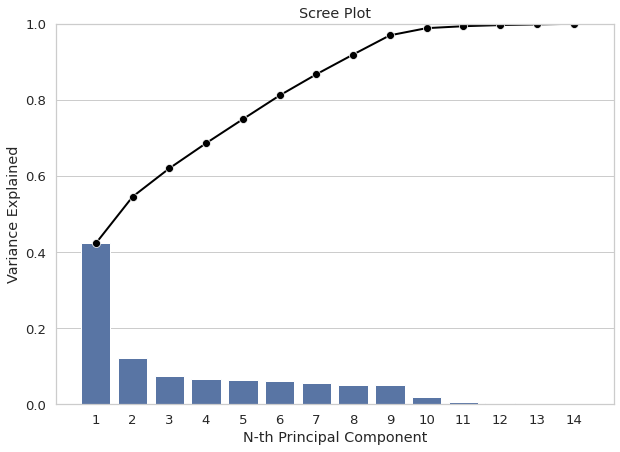

In [65]:
PC_components = np.arange(pca.n_components_) + 1

scree = sns.set(style = 'whitegrid', font_scale = 1.2)

fig, ax = plt.subplots(figsize=(10, 7))

scree = sns.barplot(x = PC_components, y = pca.explained_variance_ratio_, color = 'b')

scree = sns.lineplot(x = PC_components-1, 
                     y = np.cumsum(pca.explained_variance_ratio_), 
                     color = 'black', 
                     linestyle = '-', 
                     linewidth = 2, 
                     marker = 'o', 
                     markersize = 8
                    )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [66]:
pca.components_

array([[ 1.65467392e-01,  3.27840289e-02,  3.72451786e-01,
         3.83257480e-01,  3.88267290e-01,  3.91560792e-01,
         3.88508499e-01,  3.80675121e-01,  1.35111250e-01,
         1.16760454e-01,  1.28060094e-01,  1.16892109e-01,
         1.13750458e-01,  1.05475137e-01],
       [ 3.00798309e-01,  7.20294219e-02, -1.90762070e-01,
        -1.74622941e-01, -1.26882733e-01, -1.20407046e-01,
        -1.05928431e-01, -9.41679225e-02,  3.83181297e-01,
         4.08370398e-01,  3.92302236e-01,  3.49613781e-01,
         3.03908461e-01,  3.23539498e-01],
       [-3.78585907e-01, -8.69404176e-01, -3.42744882e-02,
        -1.87304601e-03,  3.47339200e-02,  3.40776042e-02,
         3.38805355e-02,  1.84780277e-02,  1.73882878e-01,
         2.01028494e-01,  1.22200498e-01,  6.23583479e-02,
        -6.09339837e-02, -5.09077461e-02],
       [-2.00022402e-01,  3.39082826e-01, -6.38786400e-02,
         7.65527339e-03,  6.05345017e-02,  7.47625831e-02,
         3.95209420e-02, -7.06384178e-02,  3.

In [67]:
pcsComponents_df = pd.DataFrame(pca.components_.transpose(), 
                                columns=pcaSummary.columns,
                                index=df_transformed.columns
                                )
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
monto_credito,0.165467,0.300798,-0.378586,-0.200022,0.035284,-0.078832,0.111146,-0.045317,-0.822064,-0.029196,-0.006209,0.015716,-0.000433,0.003341
edad,0.032784,0.072029,-0.869404,0.339083,-0.039855,0.071416,-0.078753,0.027019,0.330440,-0.009048,0.000116,-0.001378,0.000130,0.001064
amortizacion_sept_2005,0.372452,-0.190762,-0.034274,-0.063879,0.041402,-0.043998,0.008159,0.009324,0.010344,0.566708,0.416051,-0.432955,-0.183768,-0.316617
amortizacion_agosto_2005,0.383257,-0.174623,-0.001873,0.007655,0.083170,-0.028834,-0.032455,-0.135649,0.016687,0.386872,0.038433,0.345026,0.329408,0.645273
amortizacion_julio_2005,0.388267,-0.126883,0.034734,0.060535,0.113784,0.099222,-0.121170,0.093106,-0.018471,0.122876,-0.484809,0.495788,-0.086406,-0.527622
amortizacion_junio_2005,0.391561,-0.120407,0.034078,0.074763,0.028364,0.014530,0.126488,0.039127,0.019116,-0.205237,-0.523202,-0.489705,-0.362078,0.346043
amortizacion_mayo_2005,0.388508,-0.105928,0.033881,0.039521,-0.106745,-0.099292,-0.007572,0.049746,0.023727,-0.420006,0.068410,-0.249473,0.718405,-0.226614
amortizacion_abril_2005,0.380675,-0.094168,0.018478,-0.070638,-0.164967,0.069259,0.007893,-0.000365,0.058690,-0.488868,0.513263,0.338708,-0.427776,0.072267
pagoprev_sept_2005,0.135111,0.383181,0.173883,0.362104,0.225630,0.040580,-0.201663,-0.748696,0.019024,-0.056590,0.047511,-0.069350,-0.044832,-0.084571
pagoprev_agosto_2005,0.116760,0.408370,0.201028,0.345707,0.148667,0.408358,-0.278849,0.578661,-0.109896,0.050841,0.147310,-0.068844,0.038906,0.124888


In [68]:
print("=============PC1=================")
print("** Más importante:")
print(pcsComponents_df.PC1.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC1.nsmallest(3))
print("=============PC2=================")
print("** Más importante:")
print(pcsComponents_df.PC2.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC2.nsmallest(3))
print("=============PC3=================")
print("** Más importante:")
print(pcsComponents_df.PC3.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC3.nsmallest(3))
print("=============PC4=================")
print("** Más importante:")
print(pcsComponents_df.PC4.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC4.nsmallest(3))
print("=============PC5=================")
print("** Más importante:")
print(pcsComponents_df.PC5.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC5.nsmallest(3))
print("=============PC6=================")
print("** Más importante:")
print(pcsComponents_df.PC6.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC6.nsmallest(3))
print("=============PC7=================")
print("** Más importante:")
print(pcsComponents_df.PC7.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC7.nsmallest(3))
print("=============PC8=================")
print("** Más importante:")
print(pcsComponents_df.PC8.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC8.nsmallest(3))

=============PC1=================
** Más importante:
amortizacion_junio_2005    0.391561
amortizacion_mayo_2005     0.388508
amortizacion_julio_2005    0.388267
Name: PC1, dtype: float64
** Menos importante:
edad                   0.032784
pagoprev_abril_2005    0.105475
pagoprev_mayo_2005     0.113750
Name: PC1, dtype: float64
=============PC2=================
** Más importante:
pagoprev_agosto_2005    0.408370
pagoprev_julio_2005     0.392302
pagoprev_sept_2005      0.383181
Name: PC2, dtype: float64
** Menos importante:
amortizacion_sept_2005     -0.190762
amortizacion_agosto_2005   -0.174623
amortizacion_julio_2005    -0.126883
Name: PC2, dtype: float64
=============PC3=================
** Más importante:
pagoprev_agosto_2005    0.201028
pagoprev_sept_2005      0.173883
pagoprev_julio_2005     0.122200
Name: PC3, dtype: float64
** Menos importante:
edad                 -0.869404
monto_credito        -0.378586
pagoprev_mayo_2005   -0.060934
Name: PC3, dtype: float64
=============PC4